# Credit Scoring - Comparative Study on Different Classification 

In [509]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import hamming_loss
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, precision_recall_curve
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import plot_roc_curve

### Data Preparation

##### Reading the sample data

In [39]:
credit_data=pd.read_csv("Taiwan.csv")

In [40]:
credit_data.head() #Displaying the first 5 rows of the dataset.

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [41]:
credit_data.tail() #Displaying the last 5 rows of the dataset.

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [42]:
credit_data.columns #displays the column names in the dataset.

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')

In [43]:
credit_data.info() #displays the informations about the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_0      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

In [44]:
credit_data.isnull().sum() # Checking for presence of the missing values in the dataset.

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64

In [45]:
print(credit_data.shape) # Printing the size of the dataset.

(30000, 25)


### Preprocessing

In [46]:
{'EDUCATION':'EDU'}.items()

dict_items([('EDUCATION', 'EDU')])

In [47]:
pd.get_dummies(X['EDUCATION'],prefix='EDU')

KeyError: 'EDUCATION'

In [48]:
def onehot_encode(cc, column_dict):
    cc=cc.copy()
    for column, prefix in column_dict.items():
        dummies = pd.get_dummies(cc[column], prefix=prefix)
        cc=pd.concat([cc, dummies],axis=1)
        cc=cc.drop(column,axis=1)
    return cc

In [49]:
def preprocess_inputs(cc):
    cc=cc.copy()
    #Drop ID.
    cc=cc.drop('ID',axis=1)
    cc=onehot_encode(
        cc,
        {
            'EDUCATION':'EDU',
            'MARRIAGE':'MA'
        }
        )
    #Split cc into X and y
    y = cc['default'].copy()
    X = cc.drop('default',axis=1).copy()
    
    #Scaling of X dataset with a standard scaler.
    scaler = StandardScaler()
    X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
    
    return X, y

In [50]:
X, y = preprocess_inputs(credit_data)

In [51]:
X

,LIMIT_BAL,SEX,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,EDU_1,EDU_2,EDU_3,EDU_4,EDU_5,EDU_6,MA_0,MA_1,MA_2,MA_3
0,-1.136720,0.810161,-1.246020,1.794564,1.782348,-0.696663,-0.666599,-1.530046,-1.486041,-0.642501,...,-0.738375,1.066900,-0.442752,-0.064163,-0.097063,-0.041266,-0.042465,1.093780,-1.066471,-0.104326
1,-0.365981,0.810161,-1.029047,-0.874991,1.782348,0.138865,0.188746,0.234917,1.992316,-0.659219,...,-0.738375,1.066900,-0.442752,-0.064163,-0.097063,-0.041266,-0.042465,-0.914261,0.937672,-0.104326
2,-0.597202,0.810161,-0.161156,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,-0.298560,...,-0.738375,1.066900,-0.442752,-0.064163,-0.097063,-0.041266,-0.042465,-0.914261,0.937672,-0.104326
3,-0.905498,0.810161,0.164303,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,-0.057491,...,-0.738375,1.066900,-0.442752,-0.064163,-0.097063,-0.041266,-0.042465,1.093780,-1.066471,-0.104326
4,-0.905498,-1.234323,2.334029,-0.874991,0.111736,-0.696663,0.188746,0.234917,0.253137,-0.578618,...,-0.738375,1.066900,-0.442752,-0.064163,-0.097063,-0.041266,-0.042465,1.093780,-1.066471,-0.104326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.404759,-1.234323,0.381275,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,1.870379,...,-0.738375,-0.937295,2.258602,-0.064163,-0.097063,-0.041266,-0.042465,1.093780,-1.066471,-0.104326
29996,-0.134759,-1.234323,0.815221,-0.874991,-0.723570,-0.696663,-0.666599,0.234917,0.253137,-0.672786,...,-0.738375,-0.937295,2.258602,-0.064163,-0.097063,-0.041266,-0.042465,-0.914261,0.937672,-0.104326
29997,-1.059646,-1.234323,0.164303,3.574267,2.617654,1.809921,-0.666599,0.234917,0.253137,-0.647227,...,-0.738375,1.066900,-0.442752,-0.064163,-0.097063,-0.041266,-0.042465,-0.914261,0.937672,-0.104326
29998,-0.674276,-1.234323,0.598248,0.904712,-0.723570,0.138865,0.188746,0.234917,-0.616452,-0.717982,...,-0.738375,-0.937295,2.258602,-0.064163,-0.097063,-0.041266,-0.042465,1.093780,-1.066471,-0.104326


In [52]:
X.mean()

LIMIT_BAL    2.436569e-17
SEX         -1.597606e-14
AGE         -7.286024e-17
PAY_0       -7.559566e-17
PAY_2       -1.586202e-15
PAY_3       -1.135055e-16
PAY_4       -3.630355e-15
PAY_5       -7.266021e-16
PAY_6       -4.965398e-15
BILL_AMT1    3.868410e-17
BILL_AMT2   -4.926489e-16
BILL_AMT3   -6.192313e-16
BILL_AMT4   -7.830112e-16
BILL_AMT5    6.249362e-16
BILL_AMT6   -2.022493e-16
PAY_AMT1    -4.717060e-17
PAY_AMT2    -3.368787e-16
PAY_AMT3    -1.300675e-15
PAY_AMT4    -1.950606e-16
PAY_AMT5    -2.968200e-16
PAY_AMT6    -5.318801e-17
EDU_0        1.255237e-15
EDU_1       -4.276350e-15
EDU_2        7.212971e-16
EDU_3       -3.849795e-15
EDU_4       -7.973458e-15
EDU_5        1.023328e-14
EDU_6       -8.469780e-16
MA_0         8.357259e-16
MA_1        -3.263774e-15
MA_2        -1.525520e-15
MA_3         6.912064e-15
dtype: float64

# Visualization

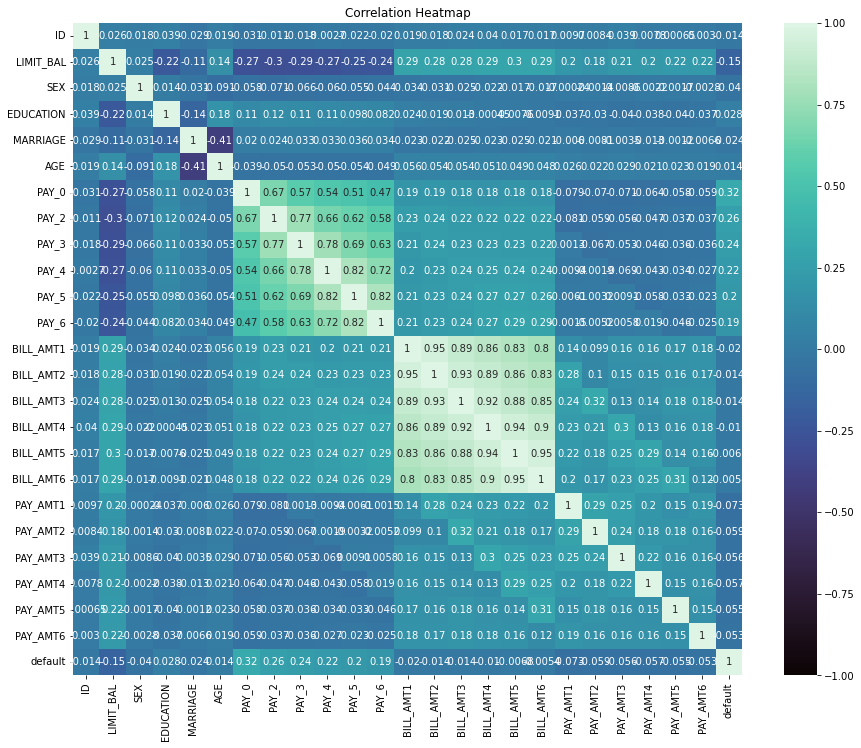

In [502]:
#Plotting the heatmap to find the correlation. This done on the original dataset.
corr=credit_data.corr()
plt.figure(figsize=(15,12))
plt.title("Correlation Heatmap")
sns.heatmap(corr, annot=True, vmin=-1.0, cmap='mako')
plt.show()

## Training the model

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)

In [36]:
'''models = {
    LogisticRegression(): "Logistic Regression",
    SVC():                  "Support Vector Machine",
    MLPClassifier():      "Neural Network"
    
    
}
for model in models.keys():
    model.fit(X_train, y_train) '''
    

C:\Users\44744\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [37]:
'''for model, name in models.items():
    print(name + ":{:.2f}%".format(model.score(X_test, y_test)*100))'''

Logistic Regression:81.43%
Support Vector Machine:82.03%
Neural Network:81.40%


### 1) Logistic Regression

In [139]:
log=LogisticRegression() #Initializing the model.

In [515]:
log.fit(X_train,y_train) #Training the model.

LogisticRegression()

In [141]:
y_pred=log.predict(X_test) # Make predictions

In [142]:
y_pred #Predicitions

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [149]:
Log_Accuracy = accuracy_score(y_test, y_pred) #Classification Accuracy

In [150]:
Log_Accuracy

0.8143333333333334

In [148]:
print('The Accuracy of Logistic Regression is' + ":{:.2f}%".format(accuracy_score(y_test, y_pred)*100))

The Accuracy of Logistic Regression is:81.43%


In [153]:
Log_precision = precision_score(y_test, y_pred, average='weighted') # Precision Score

In [154]:
Log_precision

0.7972329766726883

In [166]:
log_recall=recall_score(y_test, y_pred,average='weighted') # Recall Score

In [167]:
log_recall

0.8143333333333334

In [169]:
print('Recall: %.3f' % recall_score(y_test, y_pred,average='weighted'))

Recall: 0.814


#### Plotting the Confusion Matrix

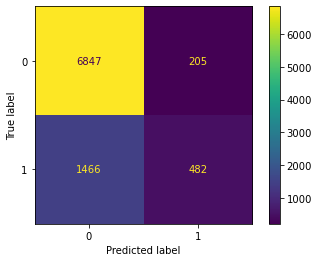

In [170]:
log_cm = confusion_matrix(y_test, y_pred, labels=model1.classes_)    
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=log.classes_)
log_disp.plot()

In [174]:
y_score = log.predict_proba(X_test)[:, 1]

In [175]:
y_score

array([0.10749975, 0.23234831, 0.51684636, ..., 0.22643831, 0.34028928,
       0.49873818])

In [187]:
log_roc_score=roc_auc_score(y_test, y_score)  # Calculating ROC_AUC Score

In [177]:
fp1, tp1, threshold1 = roc_curve(y_test, y_score)

#### Plotting ROC Curve

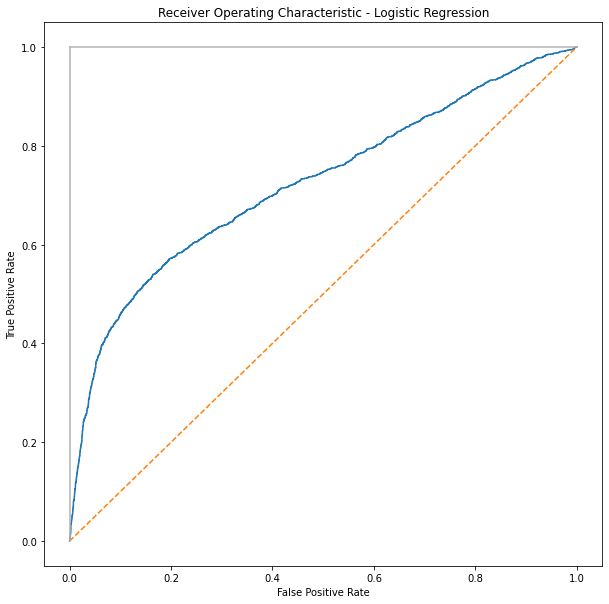

In [178]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Logistic Regression')
plt.plot(fp1, tp1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Performance Metrics

In [260]:
print('Logistic Regression Performance Metrics')
print('-'*50)
print('Classification Accuracy' + ": {:.2f}%".format(Log_Accuracy*100))
print('Precision Score' + ": {:.2f}%".format(Log_precision*100))
print('Recall Score' + ": {:.2f}%".format(log_recall*100))
print('ROC_AUC_Score' + ": {:.2f}%".format(log_roc_score*100))

Logistic Regression Performance Metrics
--------------------------------------------------
Classification Accuracy: 81.43%
Precision Score: 79.72%
Recall Score: 81.43%
ROC_AUC_Score: 72.32%


### 2) Linear Discriminant Analysis (LDA)

In [191]:
lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True) # Initializing LDA model

In [516]:
lda.fit(X_train,y_train) #Training the model.

LinearDiscriminantAnalysis(store_covariance=True)

In [194]:
y_pred1=lda.predict(X_test) # Make predictions

In [195]:
lda_Accuracy = accuracy_score(y_test, y_pred1) #Classification Accuracy

In [196]:
lda_Accuracy

0.8131111111111111

In [197]:
lda_precision = precision_score(y_test, y_pred1, average='weighted') # Precision Score

In [198]:
lda_precision

0.7934767558380086

In [505]:
lda_recall=recall_score(y_test, y_pred1,average='weighted') # Recall Score

In [504]:
lda_recall

0.8131111111111111

#### Plotting Confusion matrix

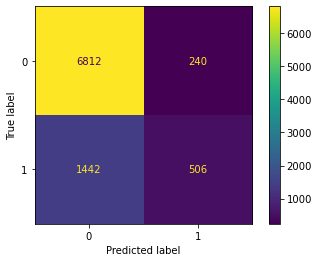

In [201]:
lda_cm = confusion_matrix(y_test, y_pred1, labels=lda.classes_)    
lda_disp = ConfusionMatrixDisplay(confusion_matrix=lda_cm, display_labels=lda.classes_)
lda_disp.plot()

In [202]:
y_score1 = lda.predict_proba(X_test)[:, 1]

In [203]:
y_score1

array([0.09993521, 0.22279453, 0.51882403, ..., 0.20663197, 0.32907258,
       0.49638015])

In [204]:
lda_roc_score=roc_auc_score(y_test, y_score1)  # Calculating ROC_AUC Score

In [205]:
lda_roc_score

0.7173061569030762

In [206]:
fp2, tp2, threshold2 = roc_curve(y_test, y_score1)

#### Plotting ROC Curve

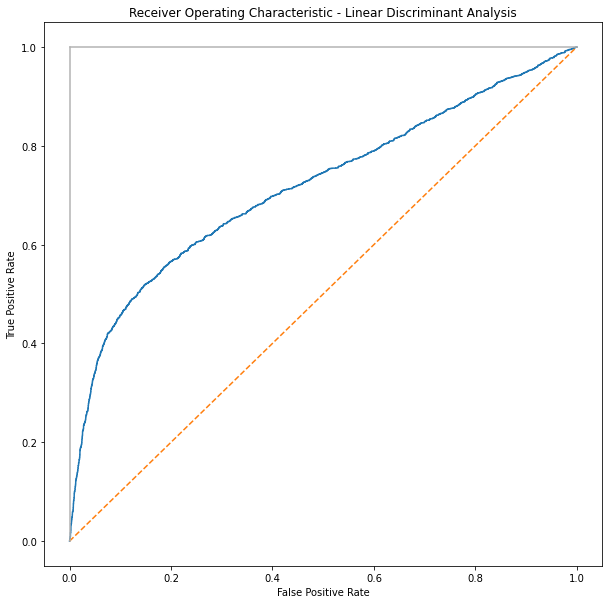

In [207]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Linear Discriminant Analysis')
plt.plot(fp2, tp2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [261]:
print('Linear Discriminant Analysis Metrics')
print('-'*50)
print('Classification Accuracy' + ": {:.2f}%".format(lda_Accuracy*100))
print('Precision Score' + ": {:.2f}%".format(lda_precision*100))
print('Recall Score' + ": {:.2f}%".format(lda_recall*100))
print('ROC_AUC_Score' + ": {:.2f}%".format(lda_roc_score*100))

Linear Discriminant Analysis Metrics
--------------------------------------------------
Classification Accuracy: 81.31%
Precision Score: 79.35%
Recall Score: 81.31%
ROC_AUC_Score: 71.73%


### 3) Quadratic Discriminant Analysis (QDA)

In [228]:
qda = QuadraticDiscriminantAnalysis(store_covariance=True) # Initializing LDA model

In [517]:
qda.fit(X_train,y_train) #Training the model.

C:\Users\44744\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis(store_covariance=True)

In [234]:
y_pred2=qda.predict(X_test) # Make predictions

In [235]:
qda_Accuracy = accuracy_score(y_test, y_pred2) #Classification Accuracy

In [236]:
qda_Accuracy

0.25633333333333336

In [237]:
qda_precision = precision_score(y_test, y_pred2, average='weighted') # Precision Score

In [238]:
qda_precision

0.7517913915148678

In [239]:
qda_recall=recall_score(y_test, y_pred2,average='weighted') # Recall Score

In [240]:
qda_recall

0.25633333333333336

#### Plotting Confusion matrix

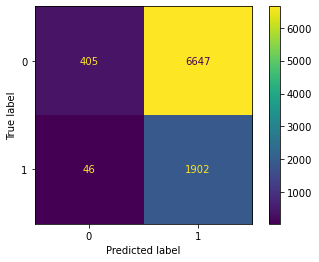

In [241]:
qda_cm = confusion_matrix(y_test, y_pred2, labels=qda.classes_)    
qda_disp = ConfusionMatrixDisplay(confusion_matrix=qda_cm, display_labels=qda.classes_)
qda_disp.plot()

In [242]:
y_score2 = qda.predict_proba(X_test)[:, 1]

In [243]:
y_score2

array([1., 1., 1., ..., 1., 1., 1.])

In [246]:
qda_roc_score=roc_auc_score(y_test, y_score2)  # Calculating ROC_AUC Score

In [247]:
qda_roc_score

0.6341988991137701

In [248]:
fp3, tp3, threshold3 = roc_curve(y_test, y_score2)

#### Plotting ROC Curve

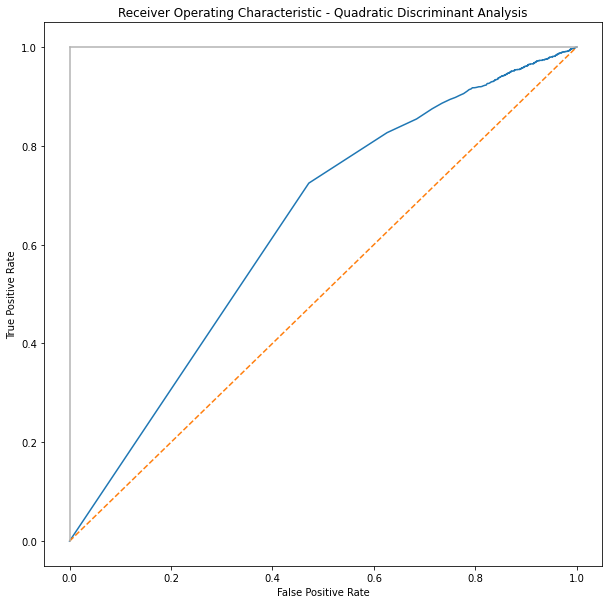

In [249]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Quadratic Discriminant Analysis')
plt.plot(fp3, tp3)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [278]:
print('Quadratic Discriminant Analysis Metrics')
print('-'*50)
print('Classification Accuracy' + ": {:.2f}%".format(qda_Accuracy*100))
print('Precision Score' + ": {:.2f}%".format(qda_precision*100))
print('Recall Score' + ": {:.2f}%".format(qda_recall*100))
print('ROC_AUC_Score' + ": {:.2f}%".format(qda_roc_score*100))

Quadratic Discriminant Analysis Metrics
--------------------------------------------------
Classification Accuracy: 25.63%
Precision Score: 75.18%
Recall Score: 25.63%
ROC_AUC_Score: 63.42%


### 4) Decision Trees

In [302]:
DT = DecisionTreeClassifier(random_state=3) # Initializing Decision Trees model

In [518]:
DT.fit(X_train,y_train) #Training the model.

DecisionTreeClassifier(random_state=3)

In [304]:
y_pred3=DT.predict(X_test) # Make predictions

In [305]:
dt_Accuracy = accuracy_score(y_test, y_pred3) #Classification Accuracy

In [306]:
dt_Accuracy

0.7278888888888889

In [307]:
dt_precision = precision_score(y_test, y_pred3, average='weighted') # Precision Score

In [308]:
dt_precision

0.7381954208937753

In [309]:
dt_recall=recall_score(y_test, y_pred3,average='weighted') # Recall Score

In [310]:
dt_recall

0.7278888888888889

#### Plotting Confusion matrix

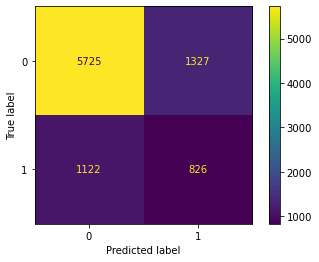

In [311]:
dt_cm = confusion_matrix(y_test, y_pred3, labels=DT.classes_)    
dt_disp = ConfusionMatrixDisplay(confusion_matrix=dt_cm, display_labels=DT.classes_)
dt_disp.plot()

In [312]:
y_score3 = DT.predict_proba(X_test)[:, 1]

In [313]:
y_score3

array([0., 0., 1., ..., 0., 0., 1.])

In [314]:
dt_roc_score=roc_auc_score(y_test, y_score3)  # Calculating ROC_AUC Score

In [315]:
dt_roc_score

0.618015583270536

In [316]:
fp4, tp4, threshold4 = roc_curve(y_test, y_score3)

#### Plotting ROC Curve

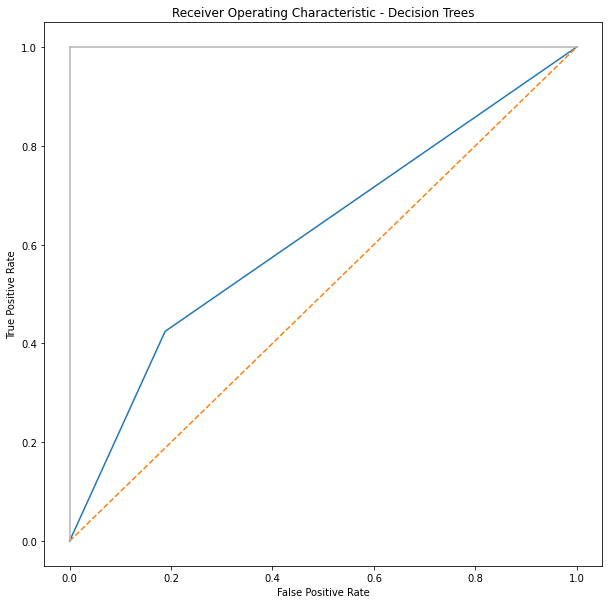

In [317]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Decision Trees')
plt.plot(fp4, tp4)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [318]:
print('Decision Trees Metrics')
print('-'*50)
print('Classification Accuracy' + ": {:.2f}%".format(dt_Accuracy*100))
print('Precision Score' + ": {:.2f}%".format(dt_precision*100))
print('Recall Score' + ": {:.2f}%".format(dt_recall*100))
print('ROC_AUC_Score' + ": {:.2f}%".format(dt_roc_score*100))

Decision Trees Metrics
--------------------------------------------------
Classification Accuracy: 72.79%
Precision Score: 73.82%
Recall Score: 72.79%
ROC_AUC_Score: 61.80%


### 5) Neural Networks

In [319]:
nn = MLPClassifier(random_state=1, max_iter=300) # Initializing neural networks model

In [519]:
nn.fit(X_train,y_train) #Training the model.

C:\Users\44744\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1)

In [322]:
y_pred4=nn.predict(X_test) # Make predictions

In [323]:
nn_Accuracy = accuracy_score(y_test, y_pred4) #Classification Accuracy

In [324]:
nn_Accuracy

0.8025555555555556

In [325]:
nn_precision = precision_score(y_test, y_pred4, average='weighted') # Precision Score

In [326]:
nn_precision

0.7817621186176197

In [327]:
nn_recall=recall_score(y_test, y_pred4,average='weighted') # Recall Score

In [328]:
nn_recall

0.8025555555555556

#### Plotting Confusion matrix

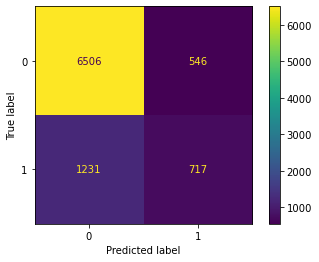

In [329]:
nn_cm = confusion_matrix(y_test, y_pred4, labels=nn.classes_)    
nn_disp = ConfusionMatrixDisplay(confusion_matrix=nn_cm, display_labels=nn.classes_)
nn_disp.plot()

In [330]:
y_score4 = nn.predict_proba(X_test)[:, 1]

In [331]:
y_score4

array([0.06343052, 0.11693085, 0.91712622, ..., 0.16024012, 0.28884171,
       0.65191957])

In [332]:
nn_roc_score=roc_auc_score(y_test, y_score4)  # Calculating ROC_AUC Score

In [333]:
nn_roc_score

0.7501184366996242

In [334]:
fp5, tp5, threshold5 = roc_curve(y_test, y_score4)

#### Plotting ROC Curve

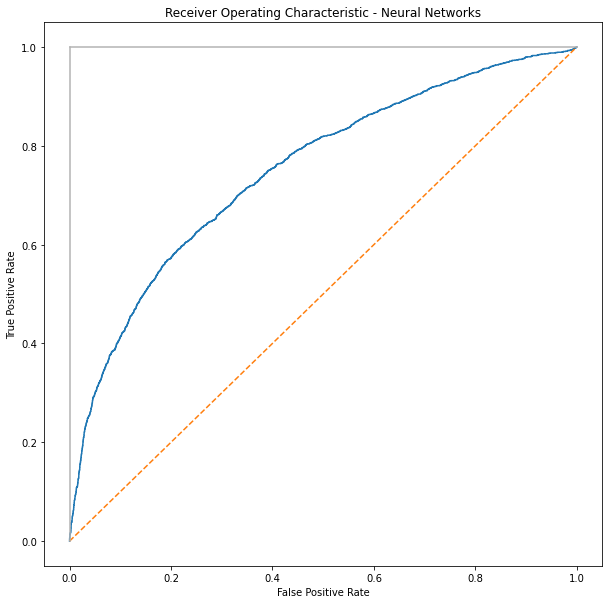

In [335]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Neural Networks')
plt.plot(fp5, tp5)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [336]:
print('Neural Networks Metrics')
print('-'*50)
print('Classification Accuracy' + ": {:.2f}%".format(nn_Accuracy*100))
print('Precision Score' + ": {:.2f}%".format(nn_precision*100))
print('Recall Score' + ": {:.2f}%".format(nn_recall*100))
print('ROC_AUC_Score' + ": {:.2f}%".format(nn_roc_score*100))

Neural Networks Metrics
--------------------------------------------------
Classification Accuracy: 80.26%
Precision Score: 78.18%
Recall Score: 80.26%
ROC_AUC_Score: 75.01%


### 6) K-Nearest Neighbor(KNN)

In [337]:
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 ) # Initializing KNN model

In [520]:
knn.fit(X_train,y_train) #Training the model.

KNeighborsClassifier()

In [339]:
y_pred5=knn.predict(X_test) # Make predictions

In [340]:
knn_Accuracy = accuracy_score(y_test, y_pred5) #Classification Accuracy

In [341]:
knn_Accuracy

0.7926666666666666

In [342]:
knn_precision = precision_score(y_test, y_pred5, average='weighted') # Precision Score

In [343]:
knn_precision

0.768260269738853

In [344]:
knn_recall=recall_score(y_test, y_pred5,average='weighted') # Recall Score

In [345]:
knn_recall

0.7926666666666666

#### Plotting Confusion matrix

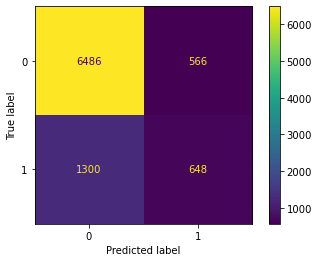

In [346]:
knn_cm = confusion_matrix(y_test, y_pred5, labels=knn.classes_)    
knn_disp = ConfusionMatrixDisplay(confusion_matrix=knn_cm, display_labels=knn.classes_)
knn_disp.plot()

In [347]:
y_score5 = knn.predict_proba(X_test)[:, 1]

In [348]:
y_score5

array([0.2, 0. , 1. , ..., 0.2, 0.4, 0.6])

In [349]:
knn_roc_score=roc_auc_score(y_test, y_score5)  # Calculating ROC_AUC Score

In [350]:
knn_roc_score

0.6960757051460491

In [351]:
fp6, tp6, threshold6 = roc_curve(y_test, y_score5)

#### Plotting ROC Curve

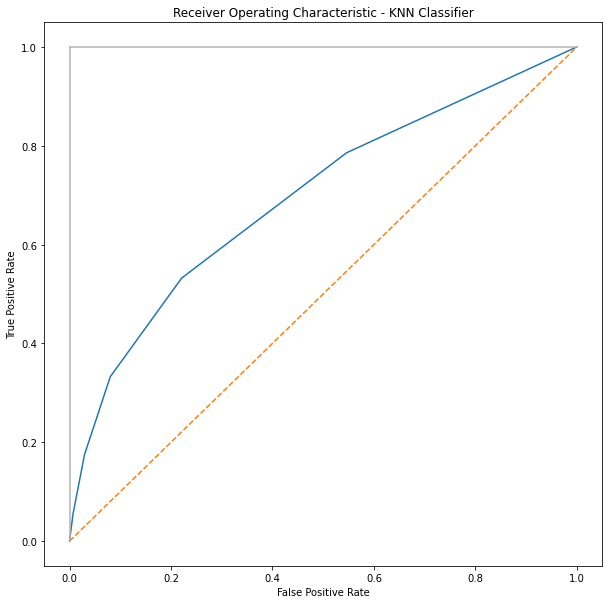

In [352]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - KNN Classifier')
plt.plot(fp6, tp6)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [353]:
print('K-NN Metrics')
print('-'*50)
print('Classification Accuracy' + ": {:.2f}%".format(knn_Accuracy*100))
print('Precision Score' + ": {:.2f}%".format(knn_precision*100))
print('Recall Score' + ": {:.2f}%".format(knn_recall*100))
print('ROC_AUC_Score' + ": {:.2f}%".format(knn_roc_score*100))

K-NN Metrics
--------------------------------------------------
Classification Accuracy: 79.27%
Precision Score: 76.83%
Recall Score: 79.27%
ROC_AUC_Score: 69.61%


### 7) Naive Bayes-BernoulliNB

In [366]:
nb = BernoulliNB() # Initializing naive bayes model

In [521]:
nb.fit(X_train,y_train) #Training the model.

BernoulliNB()

In [368]:
y_pred6=nb.predict(X_test) # Make predictions

In [369]:
nb_Accuracy = accuracy_score(y_test, y_pred6) #Classification Accuracy

In [370]:
nb_Accuracy

0.6756666666666666

In [371]:
nb_precision = precision_score(y_test, y_pred6, average='weighted') # Precision Score

In [372]:
nb_precision

0.71451396845792

In [375]:
nb_recall=recall_score(y_test, y_pred6,average='weighted') # Recall Score

In [376]:
nb_recall

0.6756666666666666

#### Plotting Confusion matrix

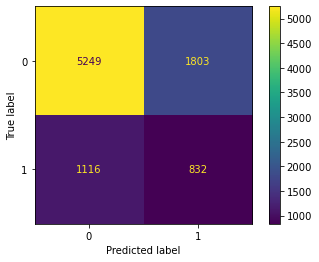

In [377]:
nb_cm = confusion_matrix(y_test, y_pred6, labels=nb.classes_)    
nb_disp = ConfusionMatrixDisplay(confusion_matrix=nb_cm, display_labels=nb.classes_)
nb_disp.plot()

In [378]:
y_score6 = nb.predict_proba(X_test)[:, 1]

In [379]:
y_score6

array([0.16623721, 0.5872409 , 0.02245944, ..., 0.64949304, 0.26973984,
       0.72583805])

In [380]:
nb_roc_score=roc_auc_score(y_test, y_score6)  # Calculating ROC_AUC Score

In [381]:
nb_roc_score

0.6309636190411854

In [382]:
fp7, tp7, threshold7 = roc_curve(y_test, y_score6)

#### Plotting ROC Curve

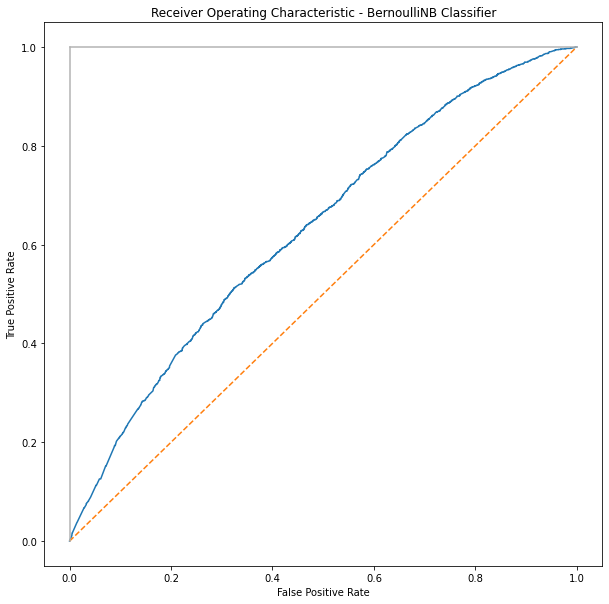

In [383]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - BernoulliNB Classifier')
plt.plot(fp7, tp7)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [384]:
print('BernoulliNB Metrics')
print('-'*50)
print('Classification Accuracy' + ": {:.2f}%".format(nb_Accuracy*100))
print('Precision Score' + ": {:.2f}%".format(nb_precision*100))
print('Recall Score' + ": {:.2f}%".format(nb_recall*100))
print('ROC_AUC_Score' + ": {:.2f}%".format(nb_roc_score*100))

BernoulliNB Metrics
--------------------------------------------------
Classification Accuracy: 67.57%
Precision Score: 71.45%
Recall Score: 67.57%
ROC_AUC_Score: 63.10%


### 8) Naive Bayes-GaussianNB

In [524]:
gnb = GaussianNB() # Initializing naive bayes model

In [525]:
gnb.fit(X_train,y_train) #Training the model.

GaussianNB()

In [401]:
y_pred7=gnb.predict(X_test) # Make predictions

In [402]:
gnb_Accuracy = accuracy_score(y_test, y_pred7) #Classification Accuracy

In [403]:
gnb_Accuracy

0.2752222222222222

In [404]:
gnb_precision = precision_score(y_test, y_pred7, average='weighted') # Precision Score

In [406]:
gnb_precision

0.7570819555929587

In [407]:
gnb_recall=recall_score(y_test, y_pred7,average='weighted') # Recall Score

In [408]:
gnb_recall

0.2752222222222222

#### Plotting Confusion matrix

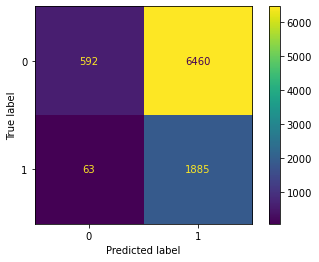

In [409]:
gnb_cm = confusion_matrix(y_test, y_pred7, labels=gnb.classes_)    
gnb_disp = ConfusionMatrixDisplay(confusion_matrix=gnb_cm, display_labels=gnb.classes_)
gnb_disp.plot()

In [410]:
y_score7 = gnb.predict_proba(X_test)[:, 1]

In [411]:
y_score7

array([0.99997129, 0.99999853, 1.        , ..., 0.99999955, 0.99999806,
       0.99999981])

In [412]:
gnb_roc_score=roc_auc_score(y_test, y_score7)  # Calculating ROC_AUC Score

In [413]:
gnb_roc_score

0.7301123525328419

In [414]:
fp8, tp8, threshold8 = roc_curve(y_test, y_score7)

#### Plotting ROC Curve

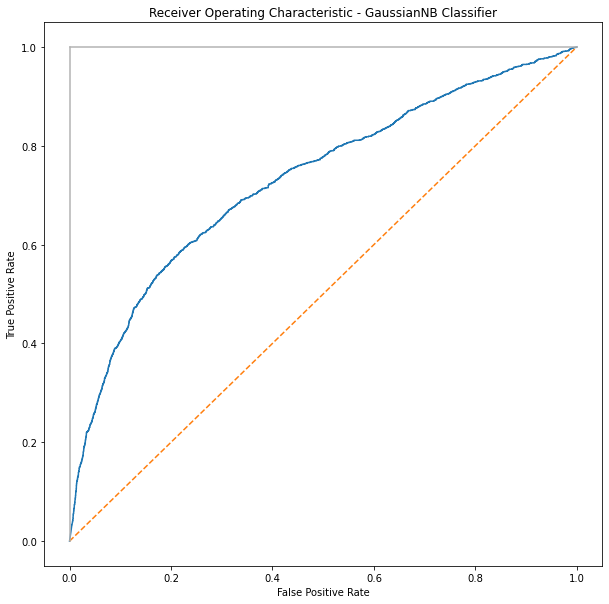

In [415]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - GaussianNB Classifier')
plt.plot(fp8, tp8)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [416]:
print('GaussianNB Metrics')
print('-'*50)
print('Classification Accuracy' + ": {:.2f}%".format(gnb_Accuracy*100))
print('Precision Score' + ": {:.2f}%".format(gnb_precision*100))
print('Recall Score' + ": {:.2f}%".format(gnb_recall*100))
print('ROC_AUC_Score' + ": {:.2f}%".format(gnb_roc_score*100))

GaussianNB Metrics
--------------------------------------------------
Classification Accuracy: 27.52%
Precision Score: 75.71%
Recall Score: 27.52%
ROC_AUC_Score: 73.01%


### 9) Random Forest Classifier

In [419]:
rf = RandomForestClassifier(max_depth=2, random_state=0) # Initializing Random Forest model

In [526]:
rf.fit(X_train,y_train) #Training the model.

RandomForestClassifier(max_depth=2, random_state=0)

In [421]:
y_pred8=rf.predict(X_test) # Make predictions

In [422]:
rf_Accuracy = accuracy_score(y_test, y_pred8) #Classification Accuracy

In [423]:
rf_Accuracy

0.8038888888888889

In [424]:
rf_precision = precision_score(y_test, y_pred8, average='weighted') # Precision Score

In [425]:
rf_precision

0.7839803176840648

In [427]:
rf_recall=recall_score(y_test, y_pred8,average='weighted') # Recall Score

In [428]:
rf_recall

0.8038888888888889

#### Plotting Confusion matrix

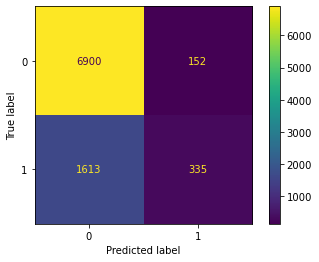

In [429]:
rf_cm = confusion_matrix(y_test, y_pred8, labels=rf.classes_)    
rf_disp = ConfusionMatrixDisplay(confusion_matrix=rf_cm, display_labels=rf.classes_)
rf_disp.plot()

In [430]:
y_score8 = rf.predict_proba(X_test)[:, 1]

In [431]:
y_score8

array([0.17921262, 0.16678435, 0.57381544, ..., 0.21021556, 0.18132863,
       0.30969776])

In [432]:
rf_roc_score=roc_auc_score(y_test, y_score8)  # Calculating ROC_AUC Score

In [433]:
rf_roc_score

0.7623186906651791

In [435]:
fp9, tp9, threshold9 = roc_curve(y_test, y_score8)

#### Plotting ROC Curve

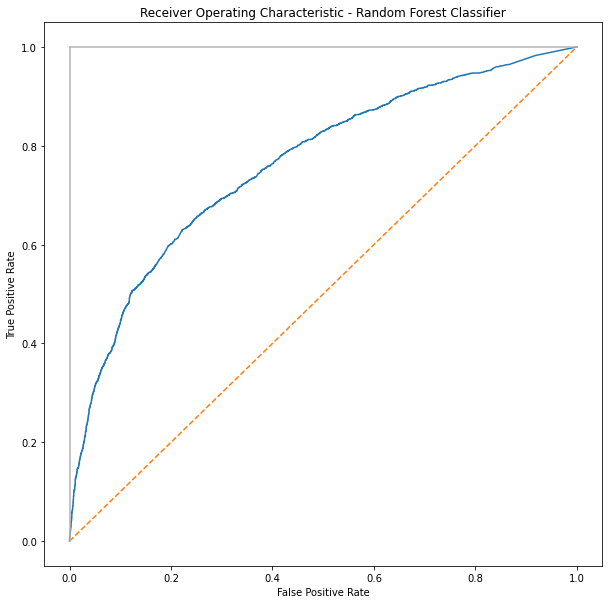

In [436]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Random Forest Classifier')
plt.plot(fp9, tp9)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [458]:
print('Random Forest Metrics')
print('-'*50)
print('Classification Accuracy' + ": {:.2f}%".format(rf_Accuracy*100))
print('Precision Score' + ": {:.2f}%".format(rf_precision*100))
print('Recall Score' + ": {:.2f}%".format(rf_recall*100))
print('ROC_AUC_Score' + ": {:.2f}%".format(rf_roc_score*100))

Random Forest Metrics
--------------------------------------------------
Classification Accuracy: 80.39%
Precision Score: 78.40%
Recall Score: 80.39%
ROC_AUC_Score: 76.23%


### 10) Support Vector Machine Classifier - Linear

In [440]:
svc = SVC(kernel='linear', random_state=0)   # Initializing SVC model

In [527]:
svc.fit(X_train,y_train) #Training the model.

SVC(kernel='linear', random_state=0)

In [542]:
y_pred9=svc.predict(X_test) # Make predictions

In [543]:
svc_Accuracy = accuracy_score(y_test, y_pred9) #Classification Accuracy

In [544]:
svc_Accuracy

0.8115555555555556

In [545]:
svc_precision = precision_score(y_test, y_pred9, average='weighted') # Precision Score

In [546]:
svc_precision

0.7922558554857262

In [547]:
svc_recall=recall_score(y_test, y_pred9,average='weighted') # Recall Score

In [548]:
svc_recall

0.8115555555555556

#### Plotting Confusion matrix

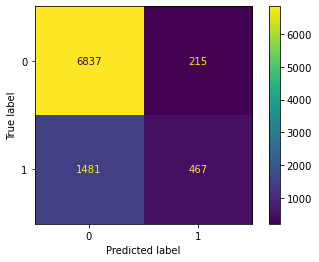

In [549]:
svc_cm = confusion_matrix(y_test, y_pred9, labels=svc.classes_)    
svc_disp = ConfusionMatrixDisplay(confusion_matrix=svc_cm, display_labels=svc.classes_)
svc_disp.plot()

In [550]:
y_score9 = rf.predict_proba(X_test)[:, 1]

In [551]:
y_score9

array([0.17921262, 0.16678435, 0.57381544, ..., 0.21021556, 0.18132863,
       0.30969776])

In [552]:
svc_roc_score=roc_auc_score(y_test, y_score9)  # Calculating ROC_AUC Score

In [553]:
svc_roc_score

0.7623186906651791

In [554]:
fp10, tp10, threshold10 = roc_curve(y_test, y_score9)

#### Plotting ROC Curve

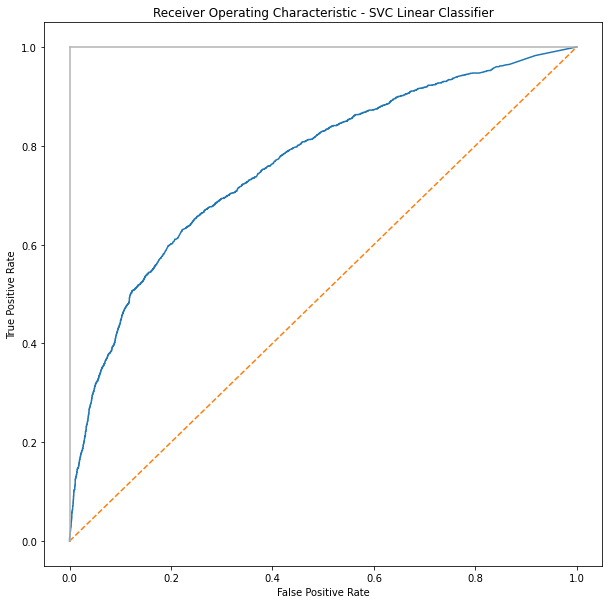

In [457]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - SVC Linear Classifier')
plt.plot(fp10, tp10)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [459]:
print('SVC Linear Metrics')
print('-'*50)
print('Classification Accuracy' + ": {:.2f}%".format(svc_Accuracy*100))
print('Precision Score' + ": {:.2f}%".format(svc_precision*100))
print('Recall Score' + ": {:.2f}%".format(svc_recall*100))
print('ROC_AUC_Score' + ": {:.2f}%".format(svc_roc_score*100))

SVC Linear Metrics
--------------------------------------------------
Classification Accuracy: 81.16%
Precision Score: 79.23%
Recall Score: 81.16%
ROC_AUC_Score: 76.23%


### 11) Gradient Boosting Classifier

In [503]:
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0) # Initializing Gradient Boosting model

In [528]:
gbc.fit(X_train,y_train) #Training the model.

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)

In [481]:
y_pred10=gbc.predict(X_test) # Make predictions

In [482]:
gbc_Accuracy = accuracy_score(y_test, y_pred10) #Classification Accuracy

In [483]:
gbc_Accuracy

0.82

In [484]:
gbc_precision = precision_score(y_test, y_pred10, average='weighted') # Precision Score

In [485]:
gbc_precision

0.8014939253843673

In [486]:
gbc_recall=recall_score(y_test, y_pred10,average='weighted') # Recall Score

In [487]:
gbc_recall

0.82

#### Plotting Confusion matrix

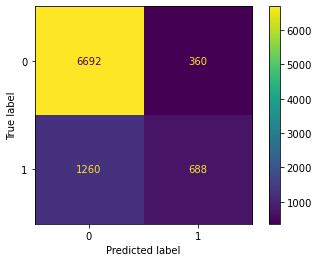

In [488]:
gbc_cm = confusion_matrix(y_test, y_pred10, labels=gbc.classes_)    
gbc_disp = ConfusionMatrixDisplay(confusion_matrix=gbc_cm, display_labels=gbc.classes_)
gbc_disp.plot()

In [495]:
y_score10 = gbc.predict_proba(X_test)[:, 1]

In [496]:
y_score10

array([0.15749614, 0.12836649, 0.83120812, ..., 0.15860391, 0.29140447,
       0.54897416])

In [497]:
gbc_roc_score=roc_auc_score(y_test, y_score10)  # Calculating ROC_AUC Score

In [498]:
gbc_roc_score

0.7701000619044679

In [499]:
fp11, tp11, threshold11 = roc_curve(y_test, y_score10)

#### Plotting ROC Curve

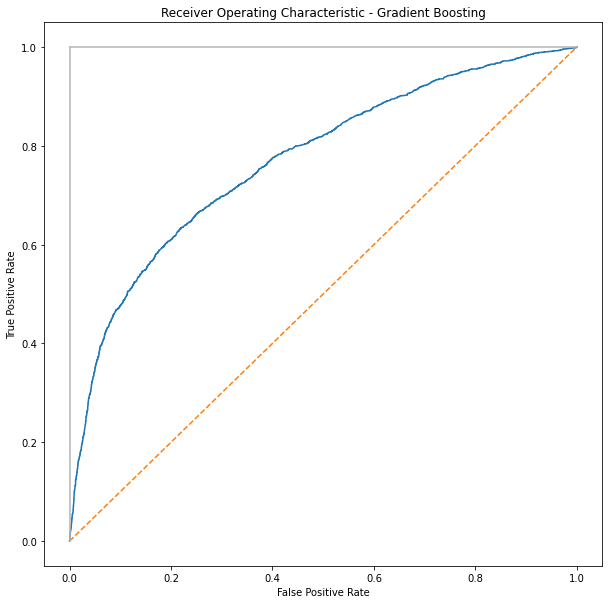

In [500]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Gradient Boosting')
plt.plot(fp11, tp11)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [501]:
print('Gradient Boosting Metrics')
print('-'*50)
print('Classification Accuracy' + ": {:.2f}%".format(gbc_Accuracy*100))
print('Precision Score' + ": {:.2f}%".format(gbc_precision*100))
print('Recall Score' + ": {:.2f}%".format(gbc_recall*100))
print('ROC_AUC_Score' + ": {:.2f}%".format(gbc_roc_score*100))

Gradient Boosting Metrics
--------------------------------------------------
Classification Accuracy: 82.00%
Precision Score: 80.15%
Recall Score: 82.00%
ROC_AUC_Score: 77.01%


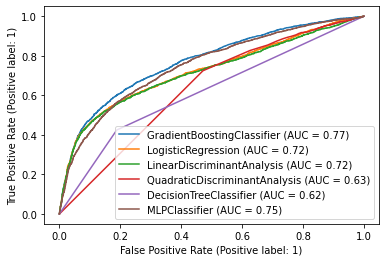

In [559]:
disp1=plot_roc_curve(gbc,X_test,y_test)
plot_roc_curve(log,X_test,y_test,ax=disp1.ax_);
plot_roc_curve(lda,X_test,y_test,ax=disp1.ax_);
plot_roc_curve(qda,X_test,y_test,ax=disp1.ax_);
plot_roc_curve(DT,X_test,y_test,ax=disp1.ax_);
plot_roc_curve(nn,X_test,y_test,ax=disp1.ax_);

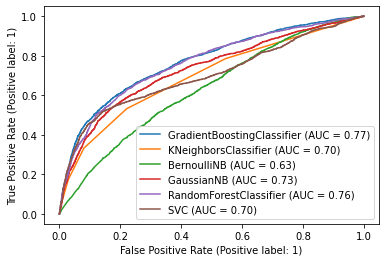

In [563]:
disp1=plot_roc_curve(gbc,X_test,y_test)
plot_roc_curve(knn,X_test,y_test,ax=disp1.ax_);
plot_roc_curve(nb,X_test,y_test,ax=disp1.ax_);
plot_roc_curve(gnb,X_test,y_test,ax=disp1.ax_);
plot_roc_curve(rf,X_test,y_test,ax=disp1.ax_);
plot_roc_curve(svc,X_test,y_test,ax=disp1.ax_);